<a href="https://colab.research.google.com/github/there-exist/thereexist_/blob/master/2019_12_02_Survival_probability_function_Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
## import library

import numpy as np
import matplotlib.pyplot as plt
import mpmath as mp

mp.dps = 12; mp.pretty = True

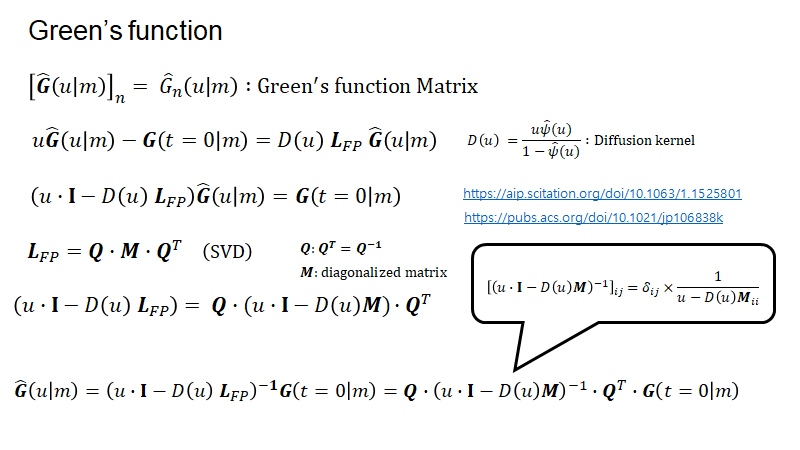

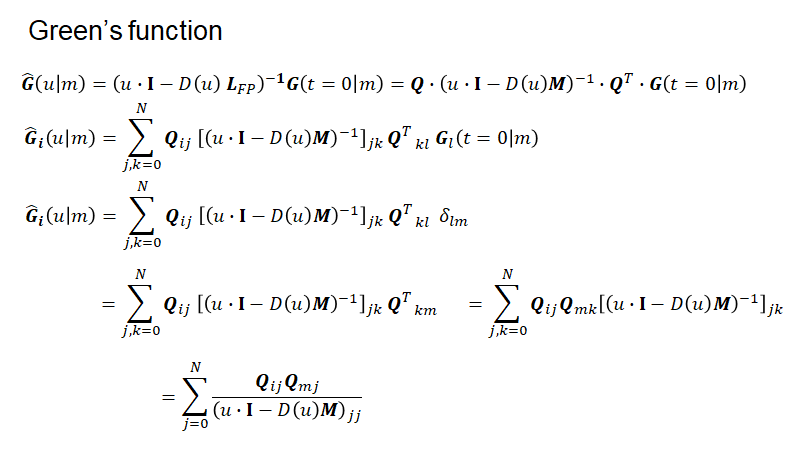

In [0]:
def Qu(N):
    i = np.array([np.linspace(0,N,N+1)])
    k = i.T
    
    Qu = np.sqrt(2/(N+1))*np.cos(k*(i+0.5)*np.pi / (N+1))
    
    Qu = Qu.T
    
    Qu[:,0] = np.sqrt(1/(N+1))
    
    return Qu

$\hat\psi(u)$ 의 형태는 여기에서 바꾸면 된다. 

$\psi(t) = 1 / (1+t/t_d)^{1+\alpha}$

$\hat\psi(u) = {(u t_d)}^{\alpha} a e^{t_d u} \Gamma\left(-\alpha, T u\right)$

In [0]:
def hat_psi(td, a, u):  
    
    result = a*mp.exp(td*u)*(td*u)**a* mp.gammainc(-a,td*u,mp.inf)
    
    return result


In [0]:
def D(td, a, u):  
  psi = hat_psi(td, a, u)
  return u*psi / (1-psi)

In [0]:
def G(n,m,N,u,td,a):
    
    Qua = Qu(N)

    i = np.linspace(0,N,N+1)
    M = -4 * np.sin(i*np.pi / (2 * (N+1)))**2
    
        
    Da = D(td,a,u)
    

    q1 = Qua[n,:]
    q2 = Qua[m,:]
    denominator = u - M*Da
       
    result = np.sum(np.multiply(np.multiply(q1,q2),denominator**-1))
    '''
    이 부분의 계산에서 np.multiply라는 함수를 새롭게 알게 되었다. 각각의 element끼리 곱해서 새로운 matrix를 만드는 함수이다.
    np.multiply([1,2,3],[1,2,3]) = [1,4,9] 
    '''
    return result

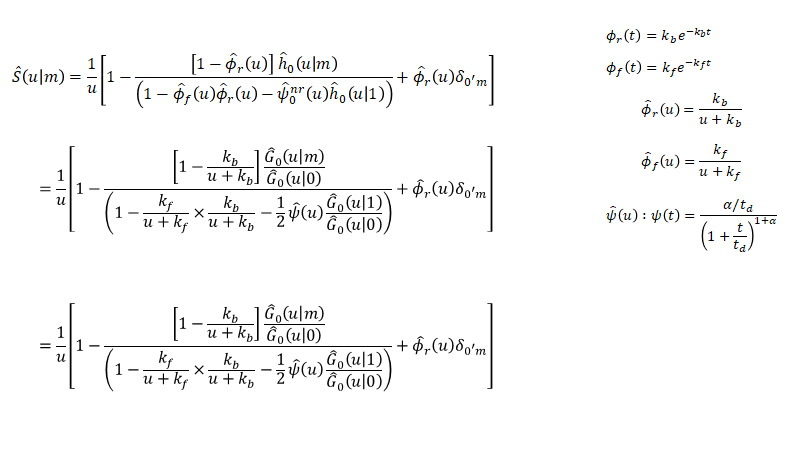

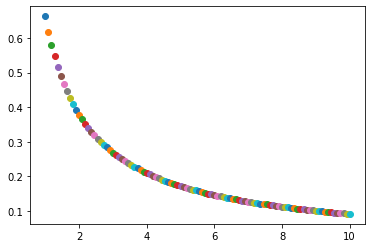

In [25]:
U = np.linspace(1,10,100)

for i in U:
  result = G(50, 50, 100, i, 1, 0.5)
        
  result = mp.chop(result, tol = 1e-5)
        
  plt.plot(i,result, 'o')

plt.show()

In [0]:
def h_0(m, N, u, td, a):
    
    result = G(0, m, N, u, td, a) / G(0, 0, N, u, td, a)
    
    return result

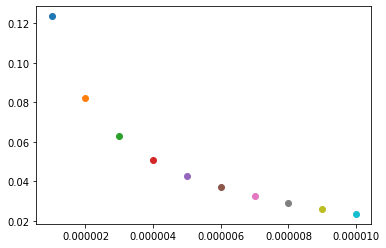

'\nplotting을 통해 h_0(u)의 형태가 나타나는 가장 적절한 input을 구했다.\n'

In [60]:
U = np.linspace(1E-6,1E-5,10)

for i in U:
  result = h_0(50, 100, i, 1, 0.5)
        
  result = mp.chop(result, tol = 1e-5)
        
  plt.plot(i,result, 'o')

plt.show()
    
'''
plotting을 통해 h_0(u)의 형태가 나타나는 가장 적절한 input을 구했다.
'''
        

m = 0


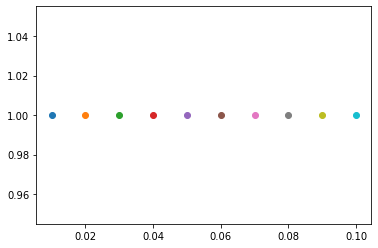

m = 5


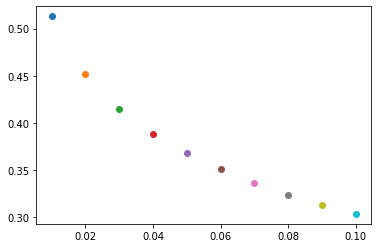

m = 10


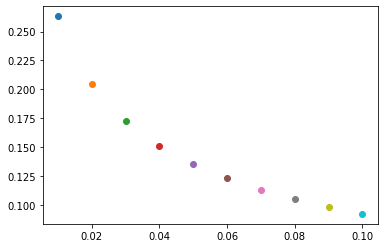

m = 15


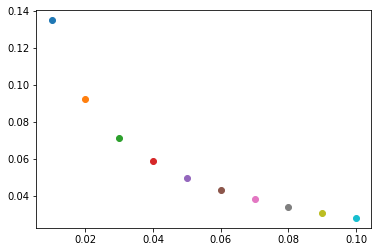

m = 20


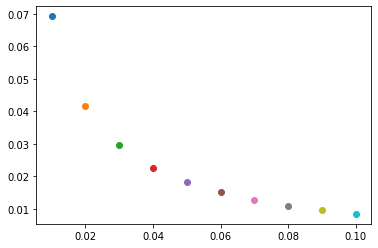

m = 25


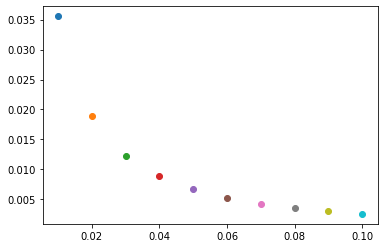

m = 30


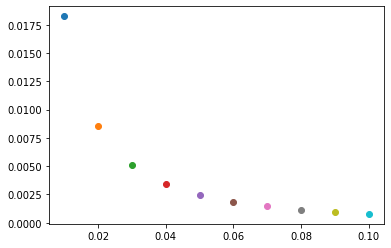

m = 35


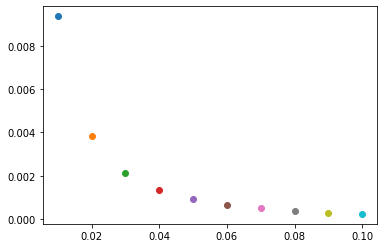

m = 40


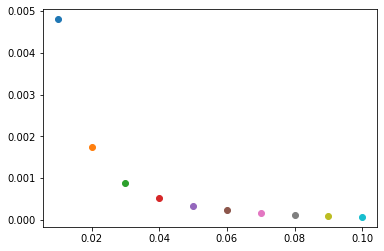

m = 45


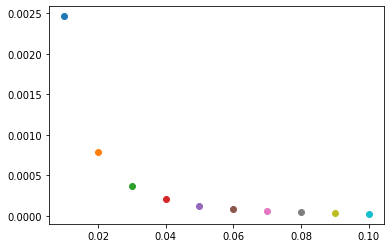

'\nplotting을 통해 h_0(u)의 형태가 나타나는 가장 적절한 input을 구했다.\n'

In [20]:
U = np.linspace(1E-2,1E-1,10)

for j in range(0,10):
    for i in U:
        result = h_0(j*5, 100, i, 1E-2, 0.5)
        
        result = mp.chop(result, tol = 1e-5)
        
        plt.plot(i,result, 'o')

    print('m =',j*5)
    plt.show()
    
'''
plotting을 통해 h_0(u)의 형태가 나타나는 가장 적절한 input을 구했다.
'''

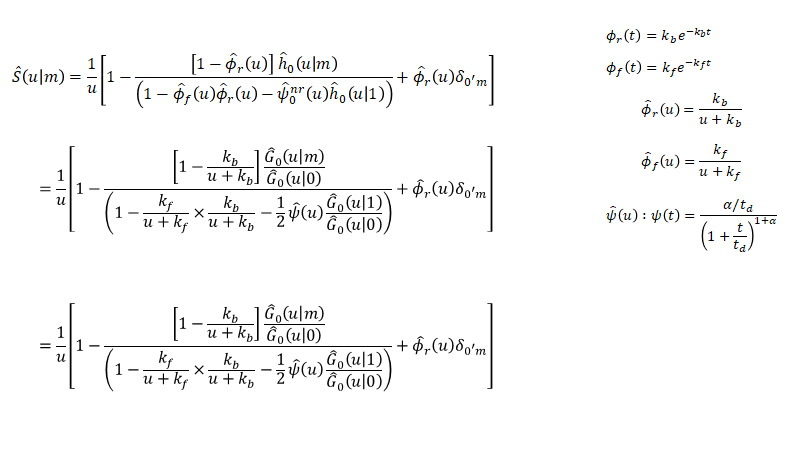

In [0]:
def Survival_laplace(m, N, u, td, a, kf, kb):
    
    upper = u / (u + kb) * h_0(m, N, u, td, a)
    
    lower = 1 - kf * kb / ((u + kf) * (u + kb)) - 0.5 * hat_psi(td, a, u) * h_0(1, N, u, td, a)
    
    

    '''
    h_0(m, N, u, td, a)
    우선은 초기 위치가 반응하지 않았다는 전제를 걸어, kronecker delta를 무시하고 계산해보자
    '''
    
    result = 1 / u * (1 - upper / lower)
    
#     result = mp.chop(result, tol = 1e-4)
    
    return result

In [0]:
def Survival_laplace2(m, N, u, td, a, kf, kb):
    
       
    lower = (u + kb)*(u+kf)*(1-0.5*hat_psi(td,a,u)*h_0(1, N, u, td, a)) - kf*kb

       

    '''
    h_0(m, N, u, td, a)
    우선은 초기 위치가 반응하지 않았다는 전제를 걸어, kronecker delta를 무시하고 계산해보자
    '''
    
    result = 1 / u - h_0(m, N, u, td, a) / lower
    
    return result

m = 0


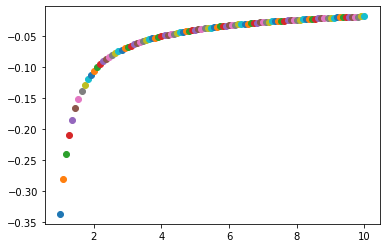

m = 5


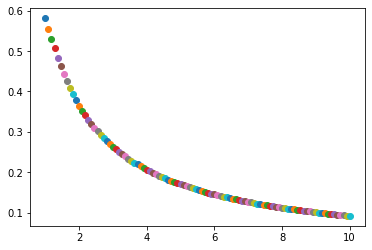

m = 10


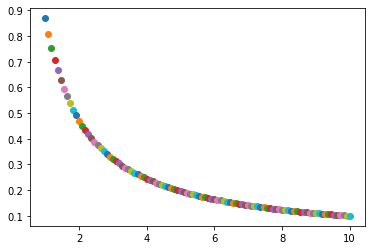

m = 15


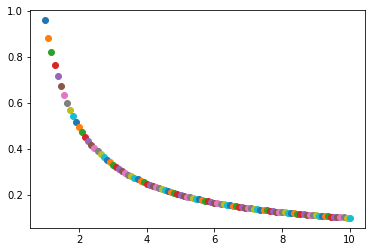

In [36]:
U = np.linspace(1,10,100)

for j in range(0,4):
    for i in U:
        result = Survival_laplace(j*5, 100, i, 1E-2, 0.9, 1, 1)
        
        plt.plot(i,result, 'o')

    print('m =',j*5)
    plt.show()

m = 0


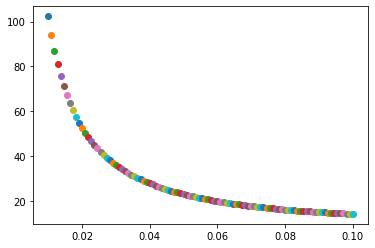

m = 5


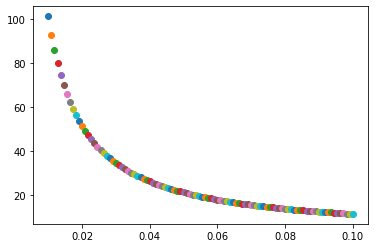

m = 10


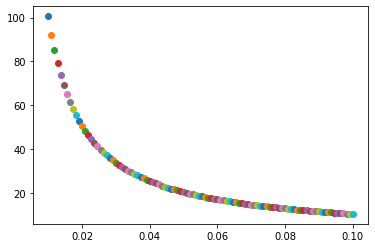

m = 15


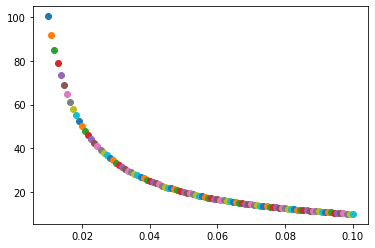

In [22]:
U = np.linspace(1E-2,1E-1,100)

for j in range(0,4):
    for i in U:
        result = Survival_laplace2(j*5, 100, i, 1E-2, 0.5, 1, 1)
        
        plt.plot(i,result, 'o')

    print('m =',j*5)
    plt.show()

m = 0


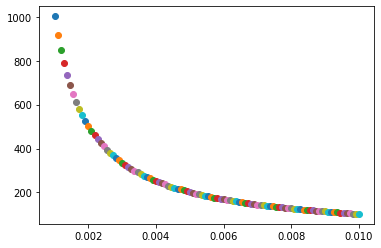

m = 5


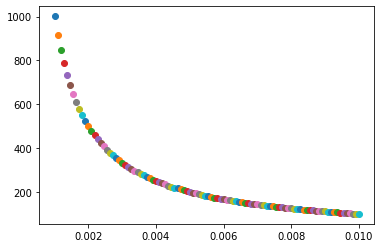

m = 10


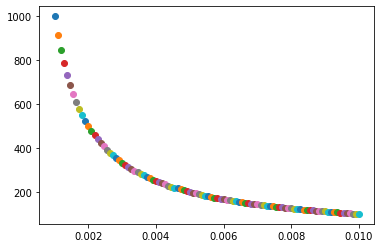

m = 15


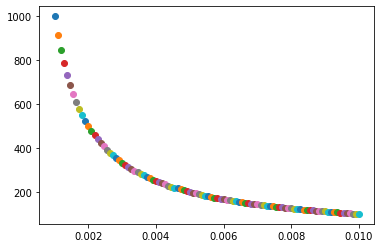

In [18]:
U = np.linspace(1E-3,1E-2,100)

for j in range(0,4):
    for i in U:
        result = Survival_laplace(j*5, 100, i, 1E-2, 0.5, 1, 1)
        
        plt.plot(i,result, 'o')

    print('m =',j*5)
    plt.show()

Survival probability에 U dependence가 있다..?! -> S의 값은 0에서 1 사이 값이 맞다. 위의 식이 올바르지 않은 것 같다.

kf = 1


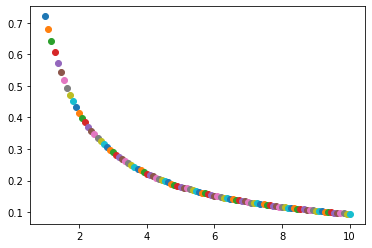

kf = 0.1


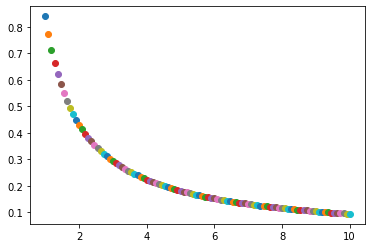

kf = 0.01


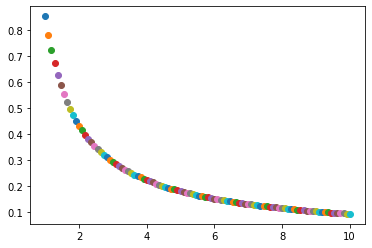

kf = 0.001


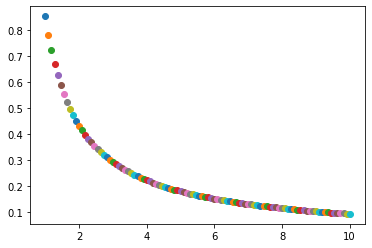

kf = 0.0001


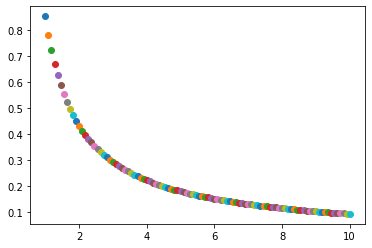

kf = 1e-05


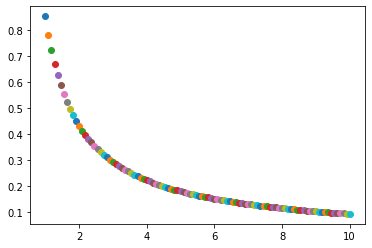

kf = 1e-06


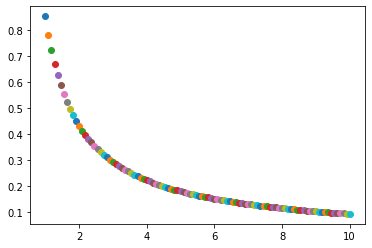

kf = 1e-07


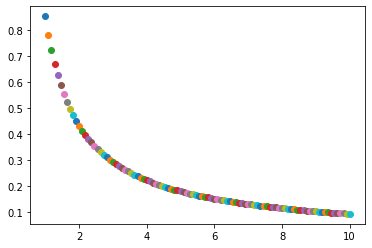

kf = 1e-08


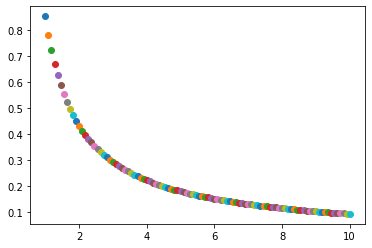

kf = 1e-09


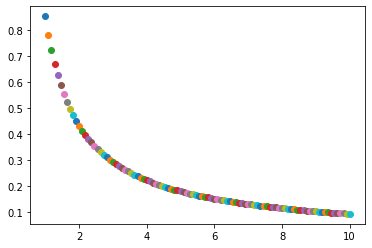

In [0]:
U = np.linspace(1,10,100)

for j in range(0,10):
    for i in U:
        result = Survival_laplace(45, 100, i, 1E-6, 0.5, 10**(-j), 1)
        
        plt.plot(i,result, 'o')

    print('kf =',10**(-j))
    plt.show()

kb = 1


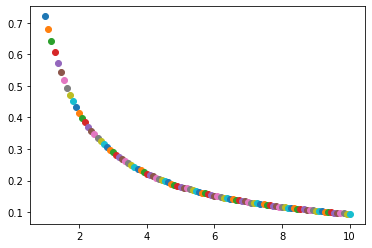

kb = 0.1


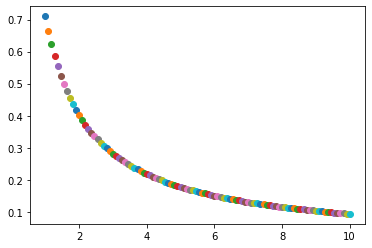

kb = 0.01


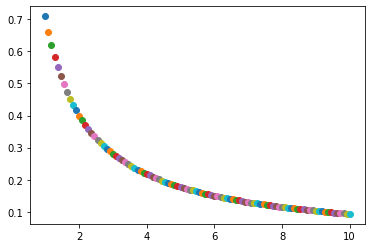

kb = 0.001


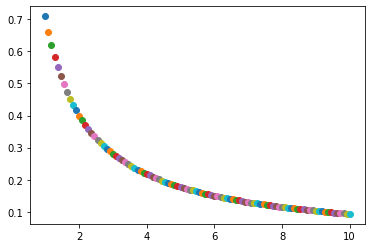

In [0]:
U = np.linspace(1,10,100)

for j in range(0,4):
    for i in U:
        result = Survival_laplace(45, 100, i, 1E-6, 0.5, 1, 10**(-j))
        
        plt.plot(i,result, 'o')

    print('kb =',10**(-j))
    plt.show()

CPU times: user 7.77 s, sys: 1.97 ms, total: 7.77 s
Wall time: 7.79 s


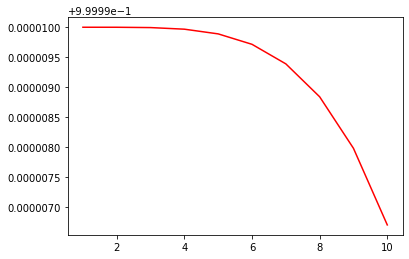

In [39]:
%%time

Survival_laplace_function = lambda u: Survival_laplace(45, 100, u, 1E-2, 0.5, 1, 1)


Time = mp.linspace(1,10,10)

time_domain_S = []

for i in Time:
    result = mp.invertlaplace(Survival_laplace_function, i, method= 'stehfest')
    
    time_domain_S.append(result) 
    
    
plt.plot(Time,time_domain_S,'r-')


CPU times: user 10.1 s, sys: 981 µs, total: 10.1 s
Wall time: 10.1 s


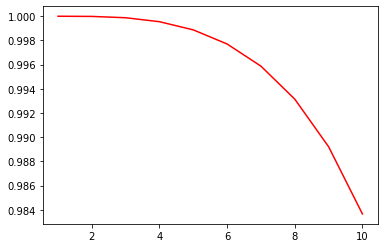

In [37]:
%%time

Survival_laplace_function = lambda u: Survival_laplace(45, 100, u, 1E-2, 0.9, 1, 1)

Time = mp.linspace(1,10,10)

time_domain_S = []

for i in Time:
    result = mp.invertlaplace(Survival_laplace_function, i, method= 'talbot')
    
    time_domain_S.append(result) 
    
    
plt.plot(Time,time_domain_S,'r-')

CPU times: user 9.86 s, sys: 2.98 ms, total: 9.87 s
Wall time: 9.87 s


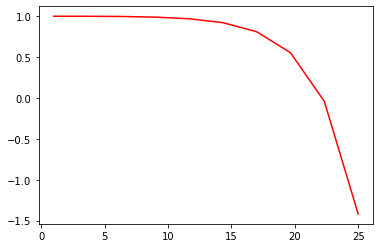

In [45]:
%%time

Survival_laplace_function = lambda u: Survival_laplace(45, 100, u, 1E-2, 0.9, 1, 1)

Time = mp.linspace(1,21,100)

time_domain_S = []

for i in Time:
    result = mp.invertlaplace(Survival_laplace_function, i, method= 'stehfest')
    
    time_domain_S.append(result) 
    
    
plt.plot(Time,time_domain_S,'r-')

CPU times: user 3min 12s, sys: 31 ms, total: 3min 12s
Wall time: 3min 13s


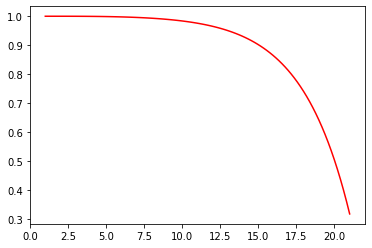

In [49]:
%%time

Survival_laplace_function = lambda u: Survival_laplace(45, 100, u, 1E-2, 0.9, 1, 1)

Time = mp.linspace(1,21,100)

time_domain_S = []

for i in Time:
    result = mp.invertlaplace(Survival_laplace_function, i, method= 'talbot')
    
    time_domain_S.append(result) 
    
    
plt.plot(Time,time_domain_S,'r-')

In [56]:
%%time

Survival_laplace_function = lambda u: Survival_laplace(45, 100, u, 1E-2, 0.9, 1, 1)

Time = mp.linspace(1,21,10)

time_domain_S = []

for i in Time:
    result = mp.invertlaplace(Survival_laplace_function, i, method= 'stehfest')
    
    time_domain_S.append(result) 
    
plt.ylim(0,1)
plt.plot(Time,time_domain_S,'r-')

KeyboardInterrupt: ignored

CPU times: user 2min 41s, sys: 14 ms, total: 2min 41s
Wall time: 2min 41s


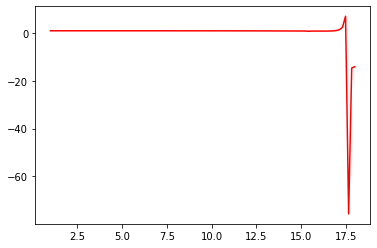

In [51]:
%%time

Survival_laplace_function = lambda u: Survival_laplace(45, 100, u, 1E-2, 0.9, 1, 1)

Time = mp.linspace(1,18,100)

time_domain_S = []

for i in Time:
    result = mp.invertlaplace(Survival_laplace_function, i, method= 'stehfest')
    
    time_domain_S.append(result) 
    
    
plt.plot(Time,time_domain_S,'r-')

CPU times: user 16.7 s, sys: 2 ms, total: 16.7 s
Wall time: 16.7 s


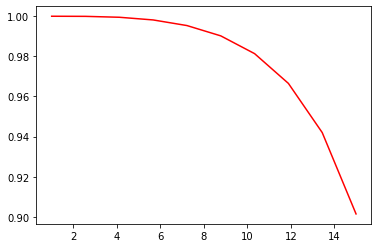

In [53]:
%%time

Survival_laplace_function = lambda u: Survival_laplace(45, 100, u, 1E-2, 0.9, 1, 1)

Time = mp.linspace(1,15,10)

time_domain_S = []

for i in Time:
    result = mp.invertlaplace(Survival_laplace_function, i, method= 'stehfest')
    
    time_domain_S.append(result) 
    
    
plt.plot(Time,time_domain_S,'r-')